# Question 1

In [1]:
import pandas as pd

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|', index_col='user_id')

# Step 4: Discover the mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print("**Mean Age per Occupation:**")
print(mean_age_per_occupation.to_markdown())
print("\n")

# Step 5: Discover the Male ratio per occupation and sort it
def male_ratio(group):
    return (group == 'M').sum() / group.count()

male_ratio_per_occupation = users.groupby('occupation')['gender'].apply(male_ratio)
sorted_male_ratio = male_ratio_per_occupation.sort_values(ascending=False)
print("**Male Ratio per Occupation (Sorted):**")
print(sorted_male_ratio.to_markdown())
print("\n")

# Step 6: Calculate the minimum and maximum ages per occupation
age_range_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("**Age Range per Occupation:**")
print(age_range_per_occupation.to_markdown())
print("\n")

# Step 7: Calculate the mean age per combination of occupation and sex
mean_age_per_combination = users.groupby(['occupation', 'gender'])['age'].mean()
print("**Mean Age per Occupation and Gender:**")
print(mean_age_per_combination.to_markdown())
print("\n")

# Step 8: Calculate the percentage of women and men per occupation
def gender_percentage(group):
    total_count = group.count()
    women_count = (group == 'F').sum()
    men_count = total_count - women_count
    women_percentage = (women_count / total_count) * 100
    men_percentage = (men_count / total_count) * 100
    return pd.Series({'Women %': women_percentage, 'Men %': men_percentage})

gender_percentage_per_occupation = users.groupby('occupation')['gender'].apply(gender_percentage)
gender_percentage_per_occupation = gender_percentage_per_occupation.reset_index()  # Reset index for formatting

print("**Gender Percentage per Occupation:**")
print(gender_percentage_per_occupation.to_markdown(index=False))  # Exclude index column from display




**Mean Age per Occupation:**
| occupation    |     age |
|:--------------|--------:|
| administrator | 38.7468 |
| artist        | 31.3929 |
| doctor        | 43.5714 |
| educator      | 42.0105 |
| engineer      | 36.3881 |
| entertainment | 29.2222 |
| executive     | 38.7188 |
| healthcare    | 41.5625 |
| homemaker     | 32.5714 |
| lawyer        | 36.75   |
| librarian     | 40      |
| marketing     | 37.6154 |
| none          | 26.5556 |
| other         | 34.5238 |
| programmer    | 33.1212 |
| retired       | 63.0714 |
| salesman      | 35.6667 |
| scientist     | 35.5484 |
| student       | 22.0816 |
| technician    | 33.1481 |
| writer        | 36.3111 |


**Male Ratio per Occupation (Sorted):**
| occupation    |   gender |
|:--------------|---------:|
| doctor        | 1        |
| engineer      | 0.970149 |
| technician    | 0.962963 |
| retired       | 0.928571 |
| programmer    | 0.909091 |
| executive     | 0.90625  |
| scientist     | 0.903226 |
| entertainment | 0.8888

# Question 2

In [2]:
import pandas as pd

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

# Step 4: Select only the Goal column
goals = euro12['Goals']
print("**Goals column:**")
print(goals.to_markdown())
print("\n")

# Step 5: How many teams participated in Euro2012?
num_teams = euro12['Team'].nunique()
print("**Number of teams participated in Euro2012:**", num_teams)
print("\n")

# Step 6: Number of columns in the dataset
num_columns = euro12.shape[1]
print("**Number of columns in the dataset:**", num_columns)
print("\n")

# Step 7: View only the columns Team, Yellow Cards and Red Cards
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("**Discipline dataframe:**")
print(discipline.to_markdown())
print("\n")

# Step 8: Sort the teams by Red Cards, then Yellow Cards
sorted_discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
print("**Sorted discipline dataframe:**")
print(sorted_discipline.to_markdown())
print("\n")

# Step 9: Calculate the mean Yellow Cards given per Team
mean_yellow_cards_per_team = euro12.groupby('Team')['Yellow Cards'].mean().reset_index()
print("**Mean Yellow Cards per Team:**")
print(mean_yellow_cards_per_team.to_markdown(index=False))
print("\n")

# Step 10: Filter teams that scored more than 6 goals
high_scoring_teams = euro12[euro12['Goals'] > 6][['Team', 'Goals']]
print("**Teams that scored more than 6 goals:**")
print(high_scoring_teams.to_markdown(index=False))
print("\n")

# Step 11: Select teams that start with G
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]['Team']
print("**Teams starting with G:**")
print(teams_starting_with_G.to_markdown(index=False))
print("\n")

# Step 12: Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]
print("**First 7 columns:**")
print(first_7_columns.to_markdown())
print("\n")

# Step 13: Select all columns except the last 3
all_columns_except_last_3 = euro12.iloc[:, :-3]
print("**All columns except the last 3:**")
print(all_columns_except_last_3.to_markdown())
print("\n")

# Step 14: Present only the Shooting Accuracy from England, Italy, and Russia
selected_teams = ['England', 'Italy', 'Russia']
shooting_accuracy_selected_teams = euro12[euro12['Team'].isin(selected_teams)][['Team', 'Shooting Accuracy']]
print("**Shooting Accuracy for England, Italy, and Russia:**")
print(shooting_accuracy_selected_teams.to_markdown())
print("\n")


**Goals column:**
|    |   Goals |
|---:|--------:|
|  0 |       4 |
|  1 |       4 |
|  2 |       4 |
|  3 |       5 |
|  4 |       3 |
|  5 |      10 |
|  6 |       5 |
|  7 |       6 |
|  8 |       2 |
|  9 |       2 |
| 10 |       6 |
| 11 |       1 |
| 12 |       5 |
| 13 |      12 |
| 14 |       5 |
| 15 |       2 |


**Number of teams participated in Euro2012:** 16


**Number of columns in the dataset:** 35


**Discipline dataframe:**
|    | Team                |   Yellow Cards |   Red Cards |
|---:|:--------------------|---------------:|------------:|
|  0 | Croatia             |              9 |           0 |
|  1 | Czech Republic      |              7 |           0 |
|  2 | Denmark             |              4 |           0 |
|  3 | England             |              5 |           0 |
|  4 | France              |              6 |           0 |
|  5 | Germany             |              4 |           0 |
|  6 | Greece              |              9 |           1 |
|  7 | Italy  

# Question 3

In [3]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Step 2: Create 3 different Series
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

# Step 3: Create a DataFrame by joining the Series by column
data = pd.concat([series1, series2, series3], axis=1)
data.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 4: Change the name of the columns
data.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5: Create a one column DataFrame with the values of the 3 Series
bigcolumn = pd.concat([series1, series2, series3], ignore_index=True)

# Step 6: Check if the DataFrame goes only until index 99
print("Does the DataFrame go only until index 99?", bigcolumn.index.max() == 99)
print("\n")

# Step 7: Reindex the DataFrame so it goes from 0 to 299
bigcolumn = bigcolumn.reindex(range(300))

# Printing the DataFrames using tabulate
print("Data DataFrame:")
print(tabulate(data, headers='keys', tablefmt='grid'))
print("\n")

print("Bigcolumn DataFrame:")
print(tabulate(bigcolumn.to_frame(), headers='keys', tablefmt='grid'))


Does the DataFrame go only until index 99? False


Data DataFrame:
+----+---------+----------+-------------------+
|    |   bedrs |   bathrs |   price_sqr_meter |
+====+=========+==========+===================+
|  0 |       4 |        1 |             23698 |
+----+---------+----------+-------------------+
|  1 |       1 |        1 |             25453 |
+----+---------+----------+-------------------+
|  2 |       2 |        3 |             26063 |
+----+---------+----------+-------------------+
|  3 |       1 |        1 |             28031 |
+----+---------+----------+-------------------+
|  4 |       3 |        1 |             27812 |
+----+---------+----------+-------------------+
|  5 |       4 |        3 |             16370 |
+----+---------+----------+-------------------+
|  6 |       3 |        1 |             21805 |
+----+---------+----------+-------------------+
|  7 |       2 |        2 |             12038 |
+----+---------+----------+-------------------+
|  8 |       4 |     

# Question - 5

In [4]:
import pandas as pd
from tabulate import tabulate

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

# Step 4: See the first 10 entries
print("**Step 4: First 10 entries**")
print(tabulate(chipo.head(10), headers='keys', tablefmt='grid'))
print("\n")

# Step 5: What is the number of observations in the dataset?
num_observations = chipo.shape[0]
print("**Step 5: Number of observations in the dataset:**", num_observations)
print("\n")

# Step 6: What is the number of columns in the dataset?
num_columns = chipo.shape[1]
print("**Step 6: Number of columns in the dataset:**", num_columns)
print("\n")

# Step 7: Print the name of all the columns
print("**Step 7: Column names:**")
print(tabulate(pd.DataFrame(chipo.columns, columns=['Column Name']), headers='keys', tablefmt='grid'))
print("\n")

# Step 8: How is the dataset indexed?
print("**Step 8: Dataset indexing:**")
index_sample = chipo.index[:10]  # Get the first 10 indices
print(tabulate(pd.DataFrame(index_sample, columns=['Index']), headers='keys', tablefmt='grid'))
print("...")  # Indicate that the output is truncated
print("...")  # Indicate that the output is truncated
print("...")  # Indicate that the output is truncated
print("...")  # Indicate that the output is truncated
print("\n")

# Step 9: Which was the most-ordered item?
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("**Step 9: Most-ordered item:**", most_ordered_item)
print("\n")

# Step 10: For the most-ordered item, how many items were ordered?
most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("**Step 10: Number of items ordered for the most-ordered item:**", most_ordered_item_count)
print("\n")

# Step 11: What was the most ordered item in the choice_description column?
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print("**Step 11: Most ordered item in the choice_description column:**", most_ordered_choice)
print("\n")

# Step 12: How many items were ordered in total?
total_items_ordered = chipo['quantity'].sum()
print("**Step 12: Total number of items ordered:**", total_items_ordered)
print("\n")

# Step 13.1: Convert item price to float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

# Checking item price type
print("**Step 13.2: Item price type after conversion:**")
print(chipo['item_price'].dtype)
print("\n")

# Step 14: How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("**Step 14: Total revenue for the period:**", revenue)
print("\n")

# Step 15: How many orders were made in the period?
num_orders = chipo['order_id'].nunique()
print("**Step 15: Number of orders made in the period:**", num_orders)
print("\n")

# Step 16: What is the average revenue amount per order?
average_revenue_per_order = revenue / num_orders
print("**Step 16: Average revenue amount per order:**", average_revenue_per_order)
print("\n")

# Step 17: How many different items are sold?
num_different_items = chipo['item_name'].nunique()
print("**Step 17: Number of different items sold:**", num_different_items)
print("\n")


**Step 4: First 10 entries**
+----+------------+------------+---------------------------------------+--------------------------------------------------------------------------------------------------------------------+--------------+
|    |   order_id |   quantity | item_name                             | choice_description                                                                                                 | item_price   |
+====+============+============+=======================================+====================================================================================================================+==============+
|  0 |          1 |          1 | Chips and Fresh Tomato Salsa          | nan                                                                                                                | $2.39        |
+----+------------+------------+---------------------------------------+-------------------------------------------------------------------------------

# Question 6

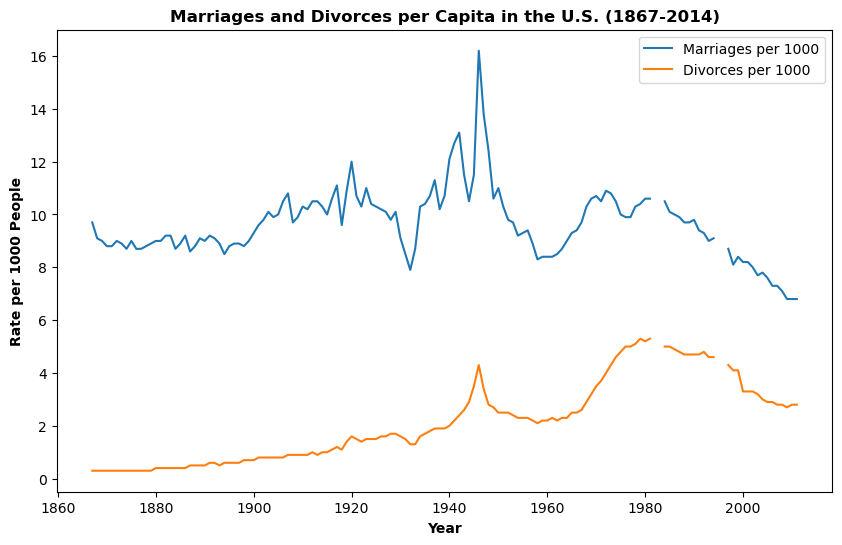

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)

# Create a line plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the data
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000')

# Set labels and title
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Rate per 1000 People',fontweight='bold')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)',fontweight='bold')

# Add legend
plt.legend()

# Display the plot
plt.show()


# Question 7

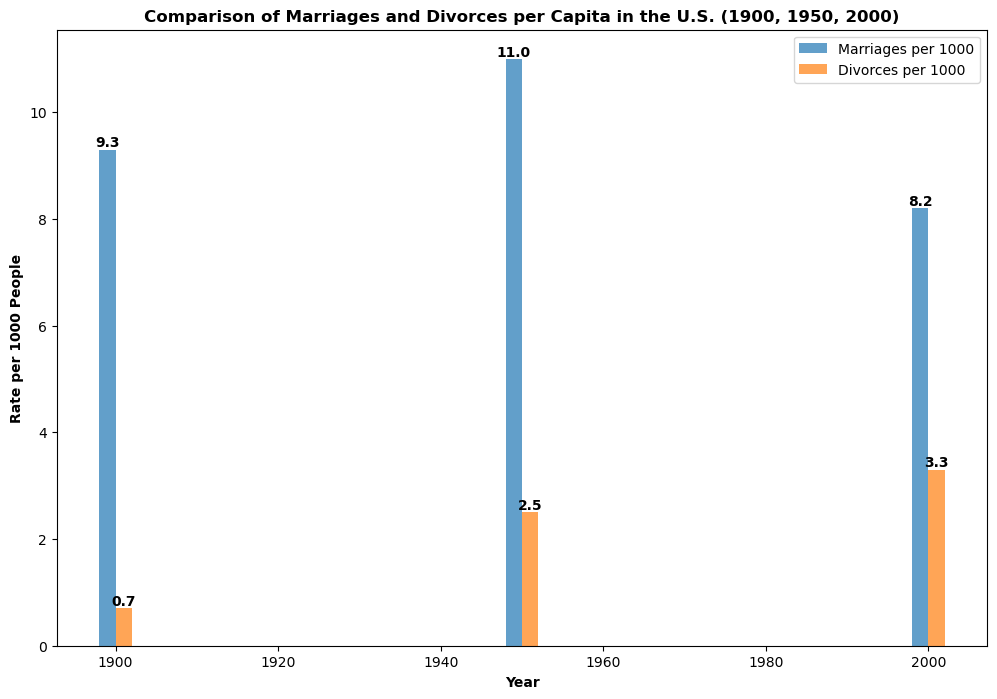

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data
file_path = "us-marriages-divorces-1867-2014.csv"
data = pd.read_csv(file_path)

# Filtering data for the years 1900, 1950, and 2000
years_of_interest = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years_of_interest)]

# Creating a vertical bar chart with custom styles
plt.figure(figsize=(12, 8))  # Increase the figure size

# Seting the width of the bars
bar_width = 2.0

# Plotting the data
marriages_bars = plt.bar(filtered_data['Year'] - bar_width/2, filtered_data['Marriages_per_1000'], width=bar_width, label='Marriages per 1000', alpha=0.7)
divorces_bars = plt.bar(filtered_data['Year'] + bar_width/2, filtered_data['Divorces_per_1000'], width=bar_width, label='Divorces per 1000', alpha=0.7)

# Seting labels and title with formatting
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Rate per 1000 People', fontweight='bold')
plt.title('Comparison of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)', fontweight='bold')

# Adding legend
plt.legend()

# Adding numbers on top of the bars
for bar in marriages_bars + divorces_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# Displaying the plot
plt.show()


# Question 8

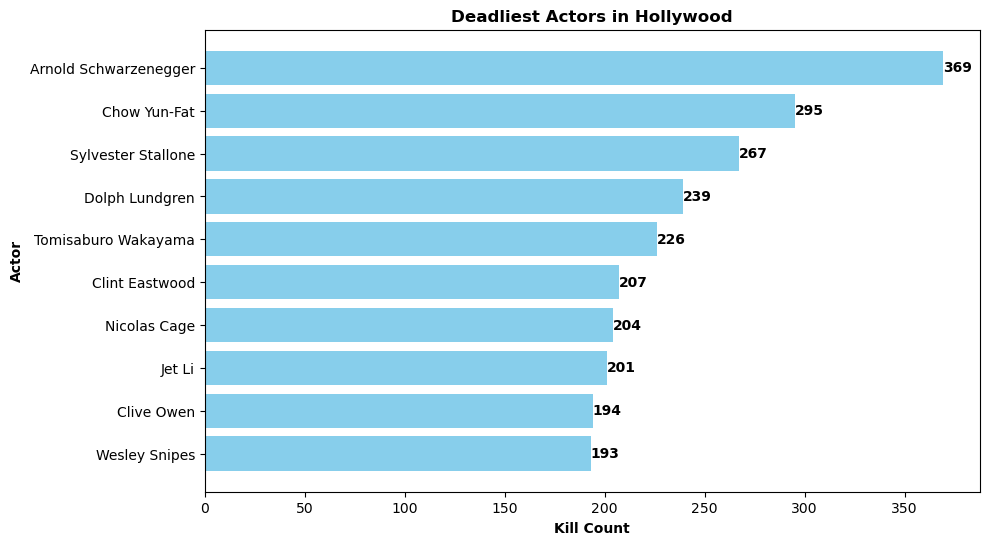

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "actor_kill_counts.csv"
data = pd.read_csv(file_path)

# Sort the data by kill count
sorted_data = data.sort_values(by='Count', ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the data
plt.barh(sorted_data['Actor'], sorted_data['Count'], color='skyblue')

# Set labels and title
plt.xlabel('Kill Count', fontweight='bold')
plt.ylabel('Actor', fontweight='bold')
plt.title('Deadliest Actors in Hollywood', fontweight='bold')

# Add actor names as labels to the bars
for index, value in enumerate(sorted_data['Count']):
    plt.text(value, index, str(value), ha='left', va='center', fontweight='bold')

# Display the plot
plt.show()


# Question 9

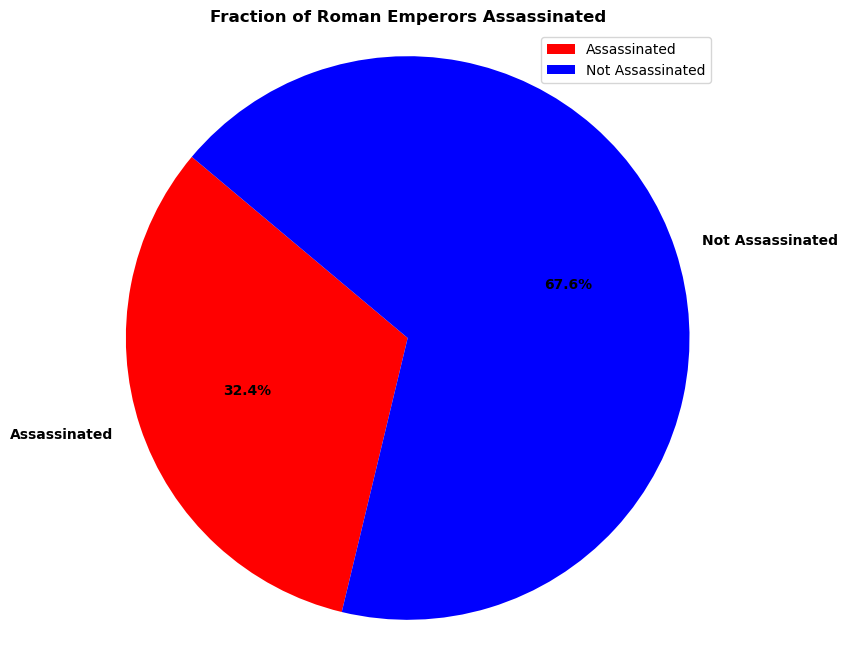

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "roman-emperor-reigns.csv"
data = pd.read_csv(file_path)

# Calculate the number of emperors assassinated
assassinated_emperors = data[data['Cause_of_Death'] == 'Assassinated']
total_emperors = len(data)
assassinated_count = len(assassinated_emperors)

# Calculate the percentage of emperors assassinated
percentage_assassinated = (assassinated_count / total_emperors) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size

# Plot the pie chart with bold labels and legends
plt.pie([assassinated_count, total_emperors - assassinated_count], labels=['Assassinated', 'Not Assassinated'],
        colors=['red', 'blue'], autopct='%1.1f%%', startangle=140, textprops={'weight': 'bold'})

# Set the aspect ratio to be equal, so the pie chart is a circle
plt.axis('equal')

# Set the title
plt.title('Fraction of Roman Emperors Assassinated', fontweight='bold')

# Add legends
plt.legend()

# Display the pie chart
plt.show()


# Question 10

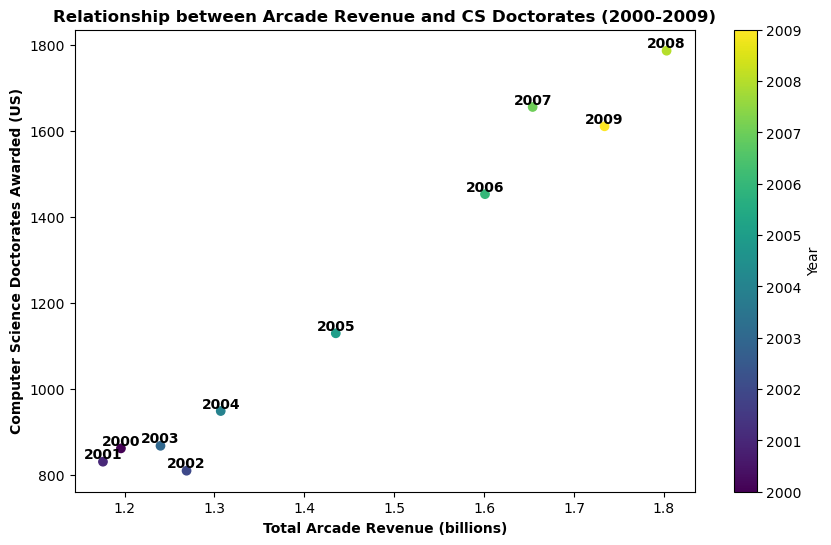

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "arcade-revenue-vs-cs-doctorates.csv"
data = pd.read_csv(file_path)

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the data points with color-coded years
scatter = plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'],
                      c=data['Year'], cmap='viridis')

# Set labels and title with bold formatting
plt.xlabel('Total Arcade Revenue (billions)', fontweight='bold')
plt.ylabel('Computer Science Doctorates Awarded (US)', fontweight='bold')
plt.title('Relationship between Arcade Revenue and CS Doctorates (2000-2009)', fontweight='bold')

# Add year as text to each data point
for i, year in enumerate(data['Year']):
    plt.text(data['Total Arcade Revenue (billions)'][i], data['Computer Science Doctorates Awarded (US)'][i], str(year),
             fontsize=10, ha='center', va='bottom', fontweight='bold')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Display the plot
plt.show()
